In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# 1: Use yfinance to Extract Stock Data

In [35]:
tesla=yf.Ticker('TSLA')

In [5]:
tesla_data=tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# 2: Use Webscraping to Extract Tesla Revenue Data

In [12]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).content

In [16]:
soup = BeautifulSoup(html_data,'html.parser')

In [17]:
table = soup.find('table')
table_rows = table.find_all('tr')
data = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data.append(row)
tesla_revenue = pd.DataFrame(data)
tesla_revenue.columns = ['Date','Revenue']

In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [19]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [20]:
tesla_revenue.tail()

,Date,Revenue
9,2013,"$2,013"
10,2012,$413
11,2011,$204
12,2010,$117
13,2009,$112


# 3: Use yfinance to Extract Stock Data

In [21]:
gme = yf.Ticker('GME')

In [22]:
gme_data = gme.history('max')

In [23]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# 4: Use Webscraping to Extract GME Revenue Data

In [24]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text

In [25]:
soup_2 = BeautifulSoup(html_data_2,'html.parser')

In [26]:
table2 = soup_2.find('table')
table_rows2 = table2.find_all('tr')
data2 = []
for tr in table_rows2:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data2.append(row)
gme_revenue = pd.DataFrame(data2)
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [27]:
gme_revenue.tail()

,Date,Revenue
12,2009,"$8,806"
13,2008,"$7,094"
14,2007,"$5,319"
15,2006,"$3,092"
16,2005,"$1,843"


# 5: Plot Tesla Stock Graph

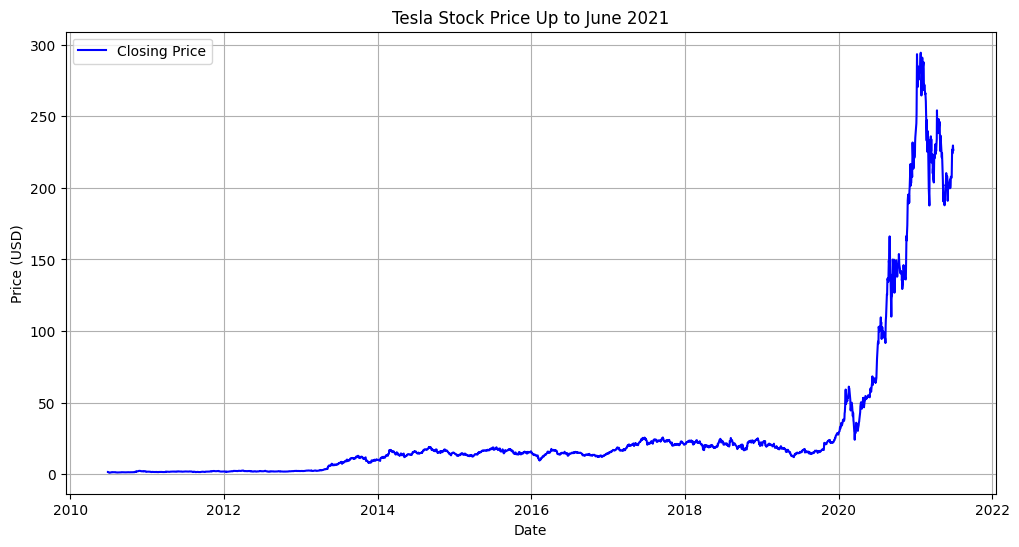

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information and save it in a DataFrame
tesla_data = tesla_ticker.history(period="max")

# Reset the index to have 'Date' as a column
tesla_data.reset_index(inplace=True)

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, title='Tesla Stock Price Up to June 2021')

# 6: Plot GameStop Stock Graph

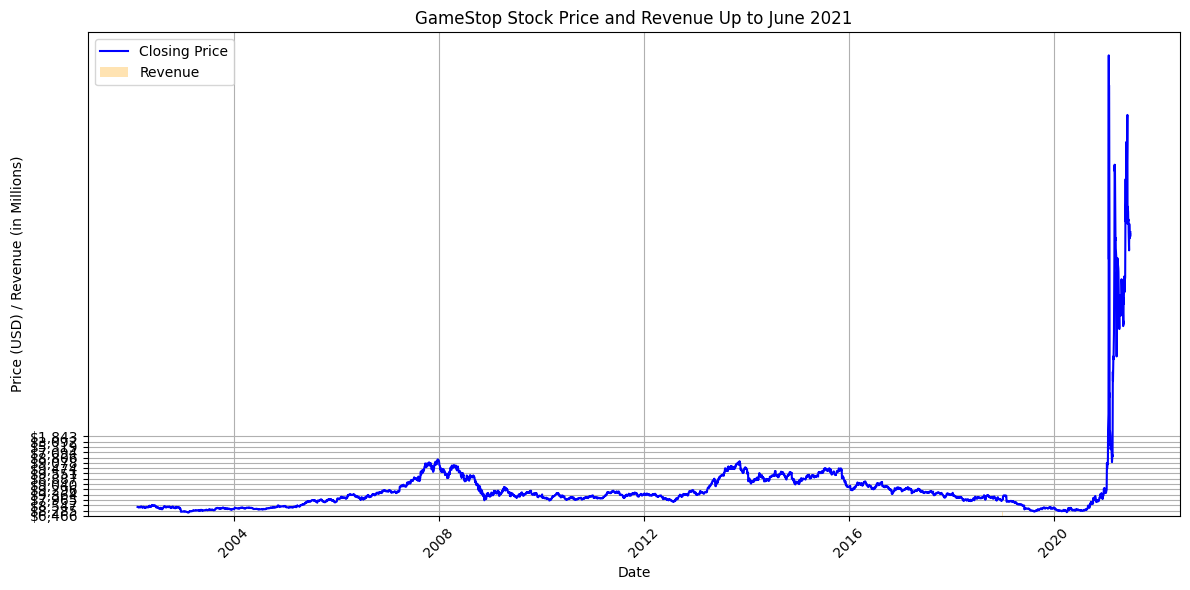

In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    
    # Plot stock closing price
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    
    # Plot revenue as a bar chart
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], alpha=0.3, label='Revenue', color='orange')
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD) / Revenue (in Millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract stock information and save it in a DataFrame
gme_data = gamestop_ticker.history(period="max")

# Reset the index to have 'Date' as a column
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# Assuming gme_revenue DataFrame is already created and contains 'Date' and 'Revenue'
# Filter gme_revenue to match the date range
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop Stock Price and Revenue Up to June 2021')

# Author

### Anthony Jesudurai